# L & T Vehicle Loan Default Prediction 

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. 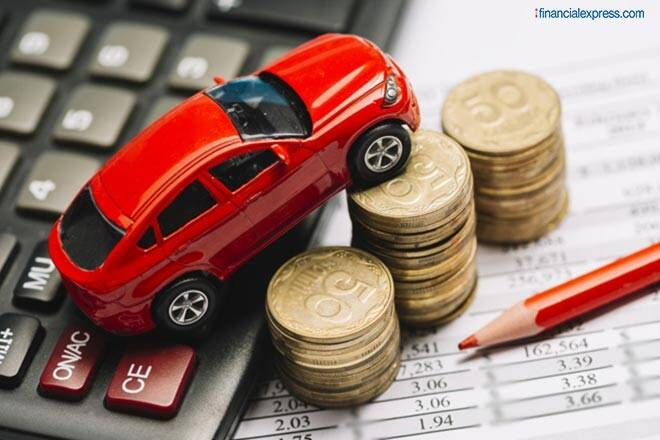

In [1]:
#Importing the Important libraries to begin 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
###############################################################################################
#Importing the Max columns and Max rows 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
plt.rcParams['figure.figsize'] =(12,6)
################################################################################################
#Importing Ploty for better interpretation purpose
import chart_studio.plotly as py 
from plotly.offline import init_notebook_mode,download_plotlyjs,iplot,plot 
init_notebook_mode(connected=True)
import plotly.graph_objects as go 
import cufflinks as cf
#################################################################################################
import warnings
warnings.filterwarnings('ignore')
##################################################################################################


# Importing the Data and Data Description


In [2]:
#Importing the Data_Description and Data 
data = pd.read_csv('train.csv')
data_description = pd.read_csv('data_dictionary.csv')

In [3]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
data_description


,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [6]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [7]:
data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


# Finding the Missing values 
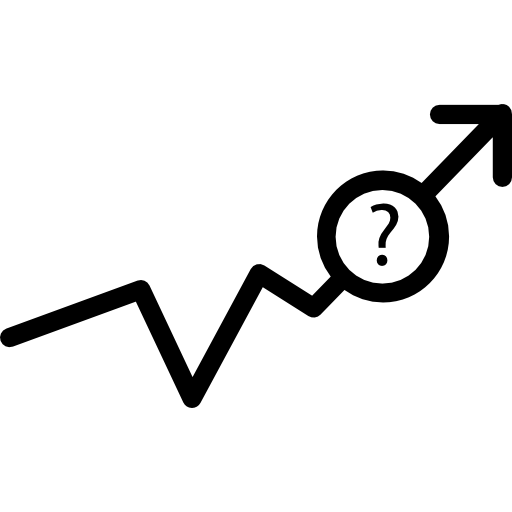

Finding up the missing values is a tedious task in machine learning especially in hude datasets so i have splitted the data
into Numerical columns and categorical columns so it makes better under and makes easy interpretation 


In [8]:
#Lets split the data into numerical columns and categorical columns 
numerical_columns = list(data.describe().columns)
categorical_columns = list(set(data.columns.difference(numerical_columns)))

In [9]:
data[numerical_columns].isnull().sum() # So there is no missing values in numerical columns 

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS

In [10]:
# But there is a huge missing values in categorical column(Employment Type)

In [11]:
data[categorical_columns].isnull().sum() 

CREDIT.HISTORY.LENGTH               0
AVERAGE.ACCT.AGE                    0
Employment.Type                  7661
Date.of.Birth                       0
PERFORM_CNS.SCORE.DESCRIPTION       0
DisbursalDate                       0
dtype: int64

In [12]:
# If the data is less that 25% we impute the missing value with mode but if it is more that 25% we can remove those 
# But now lets keep then aside lets explore the data and proceed later lets proceed with imputation process

In [13]:
data['Employment.Type'].isnull().sum()/len(data)


0.0328581109481287

# Exploring the data 
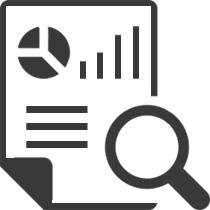

### There are Two types of numerical variables 
1.Discrete 
2.Continues

In [14]:
discrete_variables = [feature for feature in numerical_columns if len(data[feature].unique())<25]

In [15]:
len(discrete_variables)

13

In [16]:
discrete_variables

['manufacturer_id',
 'State_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PRI.OVERDUE.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'loan_default']

In [17]:
continues_variables = list(set(data.columns.difference(discrete_variables)))

In [18]:
continues_variables

['PRI.NO.OF.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.ACTIVE.ACCTS',
 'asset_cost',
 'Employment.Type',
 'Date.of.Birth',
 'UniqueID',
 'supplier_id',
 'branch_id',
 'SEC.INSTAL.AMT',
 'PRI.DISBURSED.AMOUNT',
 'Employee_code_ID',
 'NO.OF_INQUIRIES',
 'DisbursalDate',
 'Current_pincode_ID',
 'SEC.DISBURSED.AMOUNT',
 'disbursed_amount',
 'CREDIT.HISTORY.LENGTH',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'PRI.SANCTIONED.AMOUNT',
 'PERFORM_CNS.SCORE',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'ltv',
 'AVERAGE.ACCT.AGE',
 'PRIMARY.INSTAL.AMT',
 'SEC.NO.OF.ACCTS',
 'PERFORM_CNS.SCORE.DESCRIPTION']

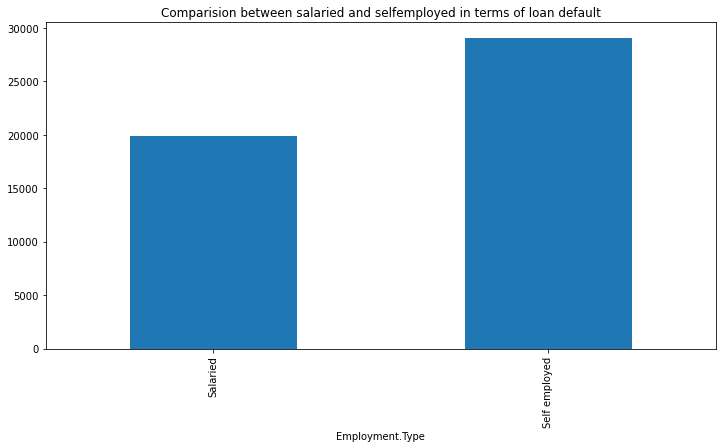

In [19]:
#Lets plot and see the null variable with loan default column
data.groupby('Employment.Type')['loan_default'].sum().plot.bar(title='Comparision between salaried and selfemployed in terms of loan default');

In [20]:
#Lets Plot and see the relationship between the discrete variables and the target variables 
discrete_variables

['manufacturer_id',
 'State_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PRI.OVERDUE.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'loan_default']

<AxesSubplot:xlabel='manufacturer_id', ylabel='count'>

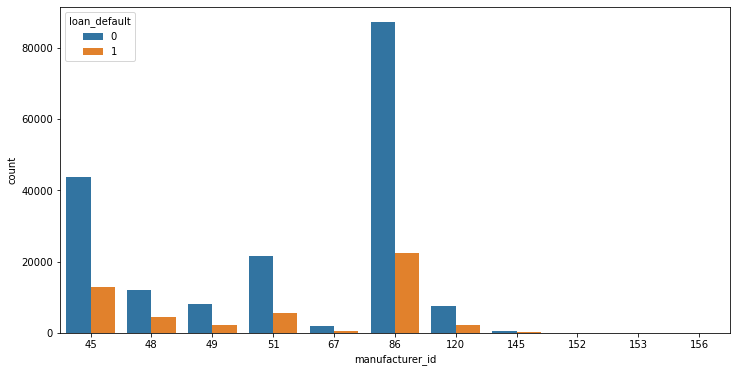

In [21]:
sns.countplot(data = data , x ='manufacturer_id' , hue='loan_default')

<AxesSubplot:xlabel='State_ID', ylabel='count'>

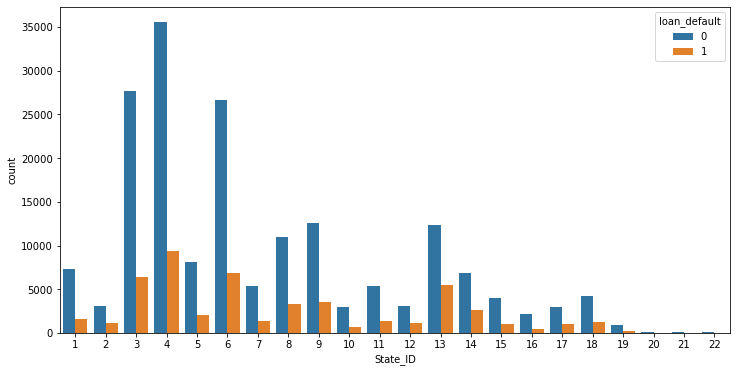

In [22]:
sns.countplot(data = data , x = 'State_ID' , hue='loan_default')

<AxesSubplot:xlabel='MobileNo_Avl_Flag', ylabel='count'>

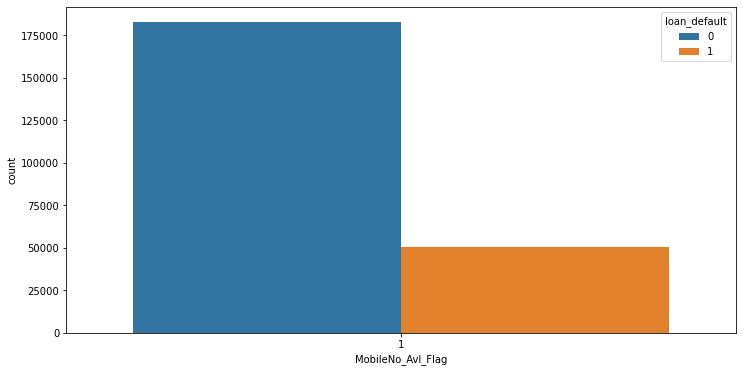

In [23]:
sns.countplot(data = data , x ='MobileNo_Avl_Flag', hue ='loan_default')

In [24]:
data.Aadhar_flag.value_counts()

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

<AxesSubplot:xlabel='Aadhar_flag', ylabel='count'>

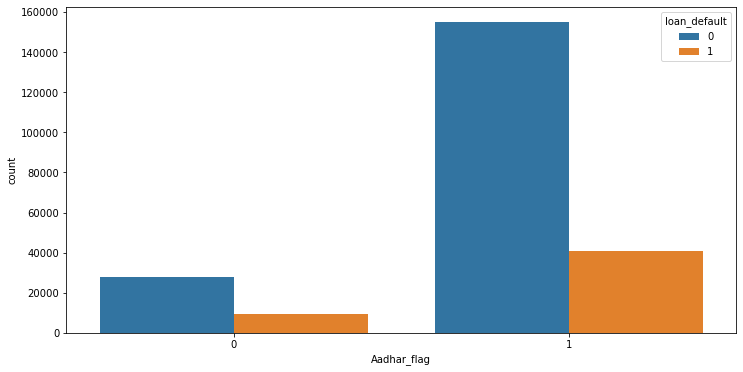

In [25]:
sns.countplot(data = data , x='Aadhar_flag',hue='loan_default')

<AxesSubplot:xlabel='PAN_flag', ylabel='count'>

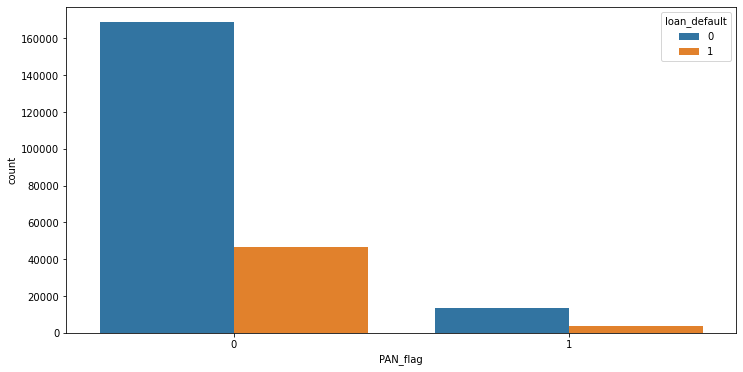

In [26]:
sns.countplot(data=data,x='PAN_flag',hue='loan_default')

<AxesSubplot:xlabel='VoterID_flag', ylabel='count'>

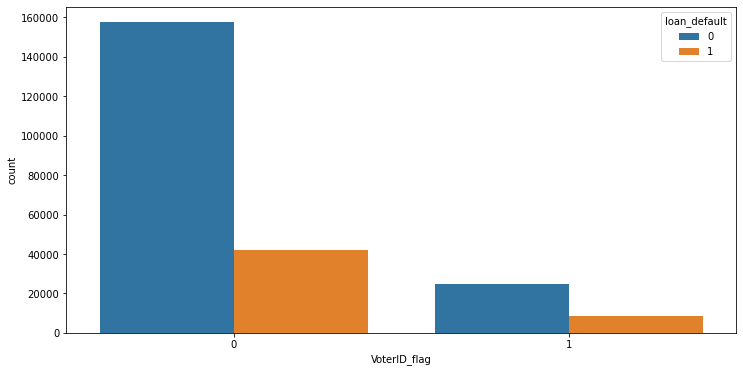

In [27]:
sns.countplot(data = data , x='VoterID_flag',hue='loan_default')

<AxesSubplot:xlabel='Driving_flag', ylabel='count'>

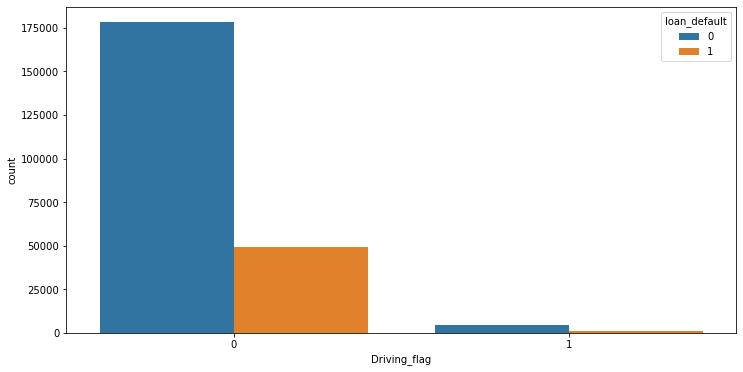

In [28]:
sns.countplot(data=data,x='Driving_flag',hue='loan_default')

<AxesSubplot:xlabel='Passport_flag', ylabel='count'>

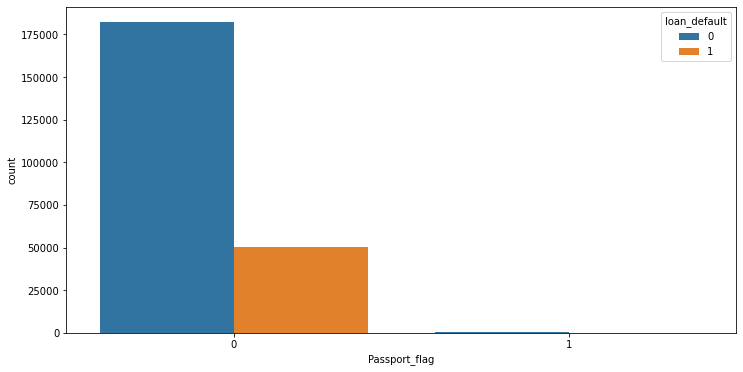

In [29]:
sns.countplot(data=data,x='Passport_flag',hue='loan_default')

<AxesSubplot:xlabel='PRI.OVERDUE.ACCTS', ylabel='count'>

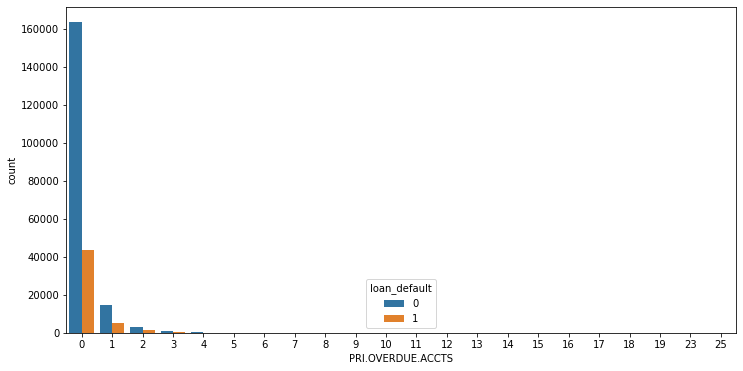

In [30]:
sns.countplot(data=data,x='PRI.OVERDUE.ACCTS',hue='loan_default')

<AxesSubplot:xlabel='SEC.ACTIVE.ACCTS', ylabel='count'>

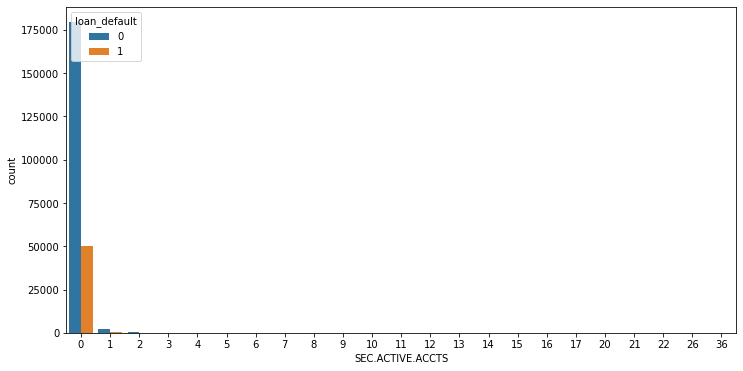

In [31]:

sns.countplot(data = data , x='SEC.ACTIVE.ACCTS', hue='loan_default')

<AxesSubplot:xlabel='SEC.OVERDUE.ACCTS', ylabel='count'>

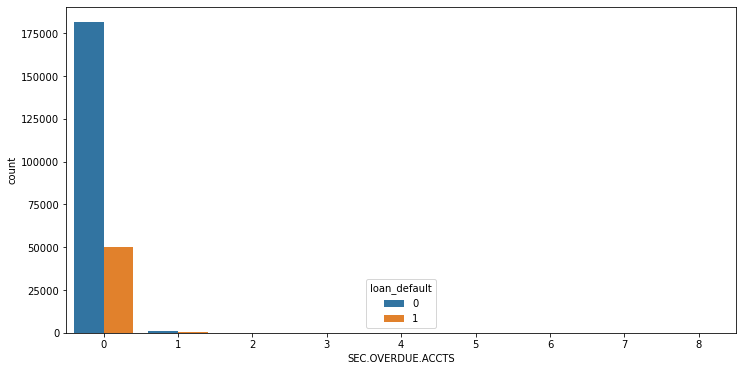

In [32]:
sns.countplot(data = data , x='SEC.OVERDUE.ACCTS', hue = 'loan_default')

<AxesSubplot:xlabel='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', ylabel='count'>

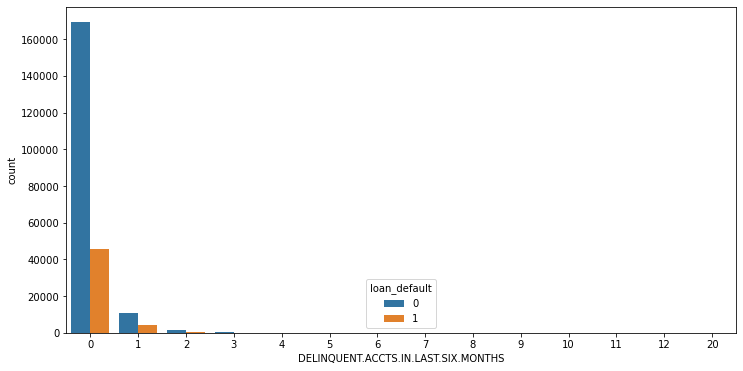

In [33]:
sns.countplot(data = data, x ='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', hue = 'loan_default')

<AxesSubplot:xlabel='loan_default', ylabel='count'>

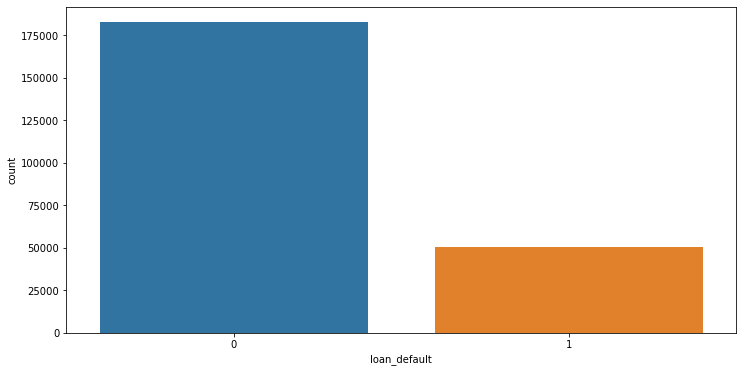

In [34]:
sns.countplot(data=data , x='loan_default')

In [35]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [36]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [37]:
continues_variables

['PRI.NO.OF.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.ACTIVE.ACCTS',
 'asset_cost',
 'Employment.Type',
 'Date.of.Birth',
 'UniqueID',
 'supplier_id',
 'branch_id',
 'SEC.INSTAL.AMT',
 'PRI.DISBURSED.AMOUNT',
 'Employee_code_ID',
 'NO.OF_INQUIRIES',
 'DisbursalDate',
 'Current_pincode_ID',
 'SEC.DISBURSED.AMOUNT',
 'disbursed_amount',
 'CREDIT.HISTORY.LENGTH',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'PRI.SANCTIONED.AMOUNT',
 'PERFORM_CNS.SCORE',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'ltv',
 'AVERAGE.ACCT.AGE',
 'PRIMARY.INSTAL.AMT',
 'SEC.NO.OF.ACCTS',
 'PERFORM_CNS.SCORE.DESCRIPTION']

In [38]:
len(continues_variables)

28

In [39]:
continuous_variables = [i for i in numerical_columns if i not in discrete_variables+['UniqueID']]
print(continuous_variables)
print("Continuous variables Count: ",(len(continuous_variables)))

['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES']
Continuous variables Count:  21


In [40]:
continuous_variables

['disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'Current_pincode_ID',
 'Employee_code_ID',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES']

<AxesSubplot:xlabel='disbursed_amount', ylabel='Count'>

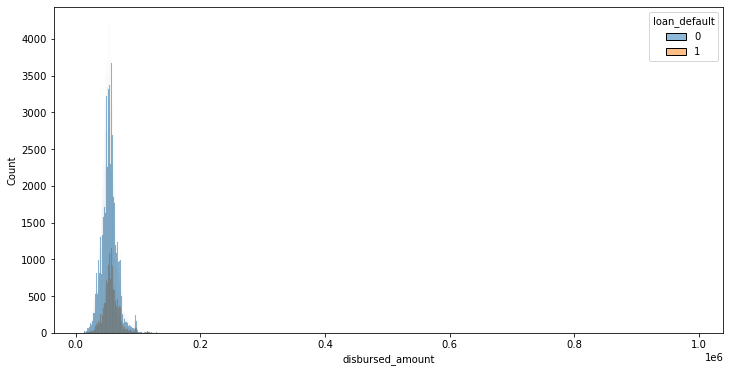

In [41]:
sns.histplot(data = data,x='disbursed_amount',hue='loan_default')

<AxesSubplot:xlabel='asset_cost', ylabel='Count'>

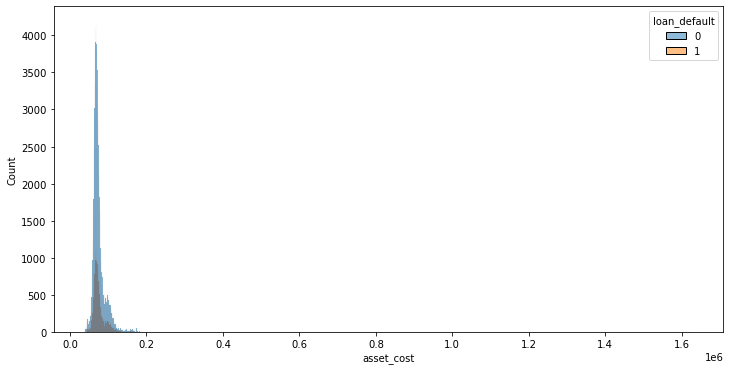

In [42]:
sns.histplot(data = data,x='asset_cost',hue='loan_default')

<AxesSubplot:xlabel='ltv', ylabel='Count'>

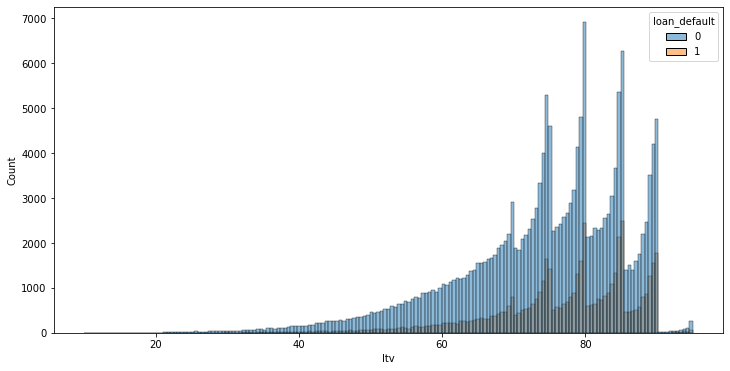

In [43]:
sns.histplot(data = data,x='ltv',hue='loan_default')

<AxesSubplot:xlabel='branch_id', ylabel='Count'>

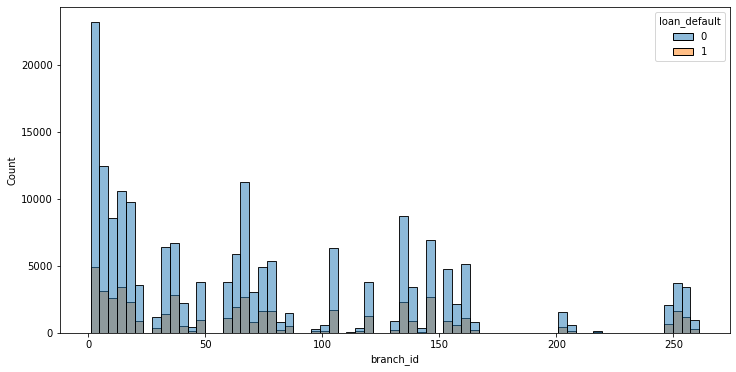

In [44]:
sns.histplot(data = data,x='branch_id',hue='loan_default')

<AxesSubplot:xlabel='supplier_id', ylabel='Count'>

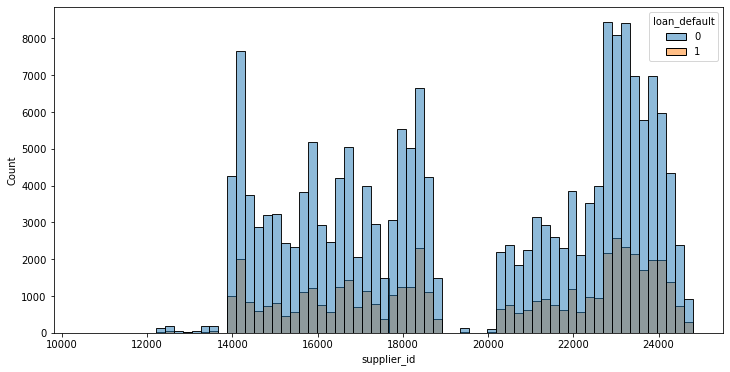

In [45]:
sns.histplot(data = data,x='supplier_id',hue='loan_default')

<AxesSubplot:xlabel='Current_pincode_ID', ylabel='Count'>

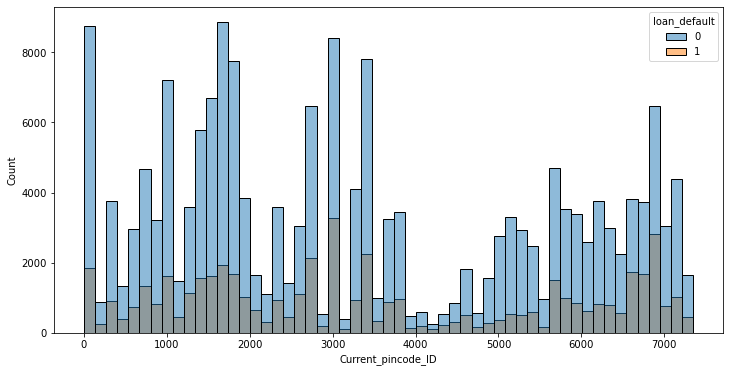

In [46]:
sns.histplot(data = data, x='Current_pincode_ID',hue='loan_default')

<AxesSubplot:xlabel='Employee_code_ID', ylabel='Count'>

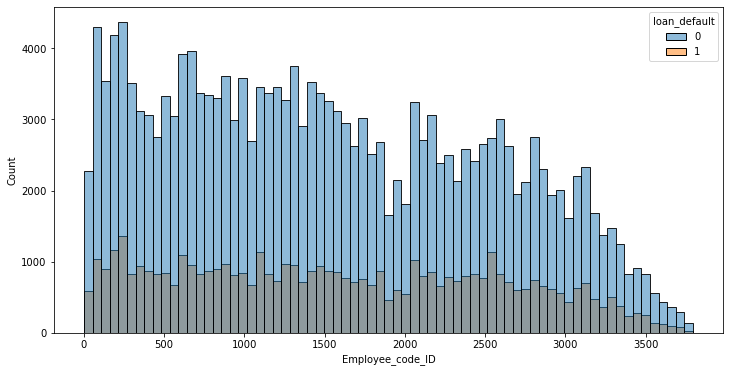

In [47]:
sns.histplot(data = data, x= 'Employee_code_ID',hue='loan_default')

<AxesSubplot:xlabel='PERFORM_CNS.SCORE', ylabel='Count'>

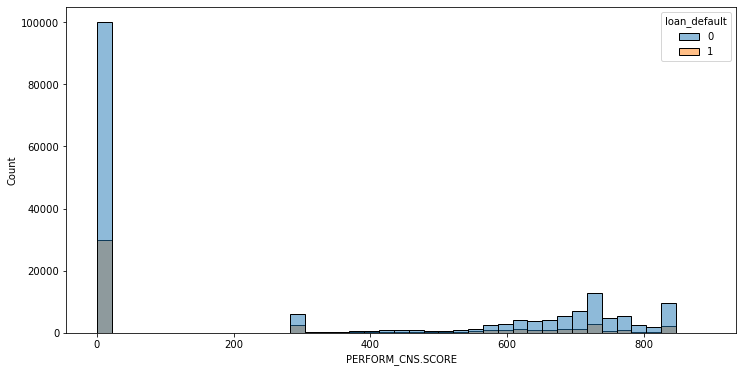

In [48]:
sns.histplot(data = data, x= 'PERFORM_CNS.SCORE',hue='loan_default')

<AxesSubplot:xlabel='PRI.NO.OF.ACCTS', ylabel='Count'>

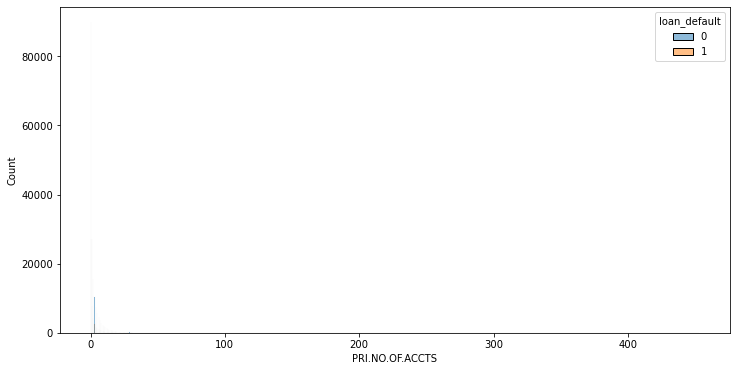

In [49]:
sns.histplot(data = data, x= 'PRI.NO.OF.ACCTS',hue='loan_default')

<AxesSubplot:>

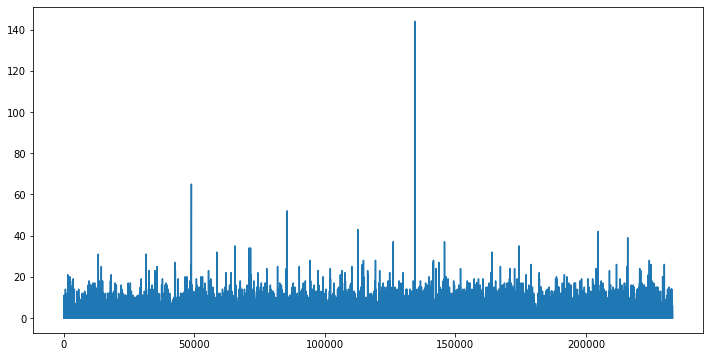

In [50]:
data['PRI.ACTIVE.ACCTS'].plot()

<AxesSubplot:>

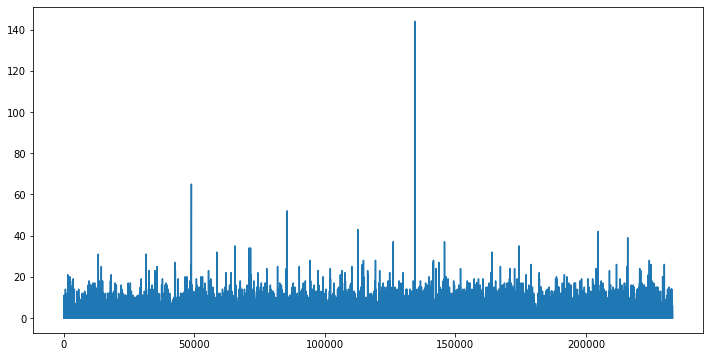

In [51]:
data['PRI.ACTIVE.ACCTS'].plot()

<AxesSubplot:>

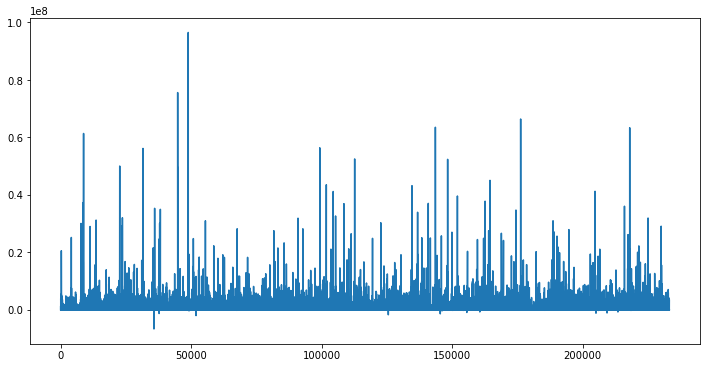

In [52]:
data['PRI.CURRENT.BALANCE'].plot()

<AxesSubplot:>

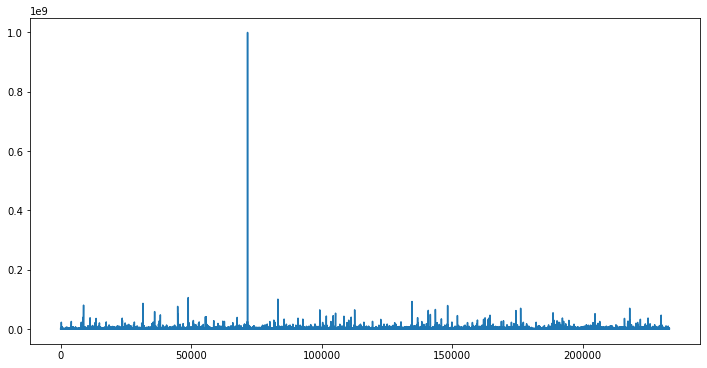

In [53]:
data[ 'PRI.SANCTIONED.AMOUNT'].plot()

<AxesSubplot:>

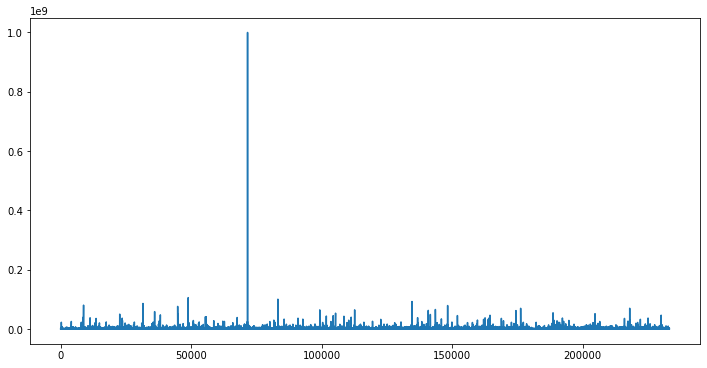

In [54]:
data[ 'PRI.DISBURSED.AMOUNT'].plot()

<AxesSubplot:>

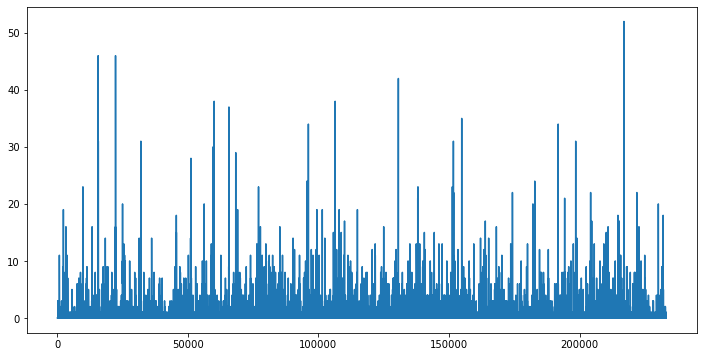

In [55]:
data[ 'SEC.NO.OF.ACCTS'].plot()

<AxesSubplot:>

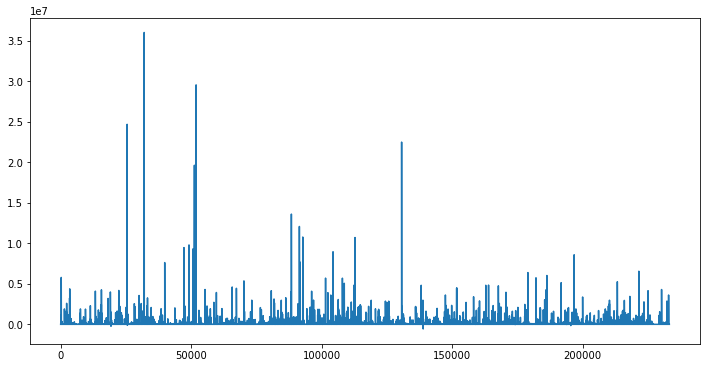

In [56]:
data[ 'SEC.CURRENT.BALANCE'].plot()

<AxesSubplot:>

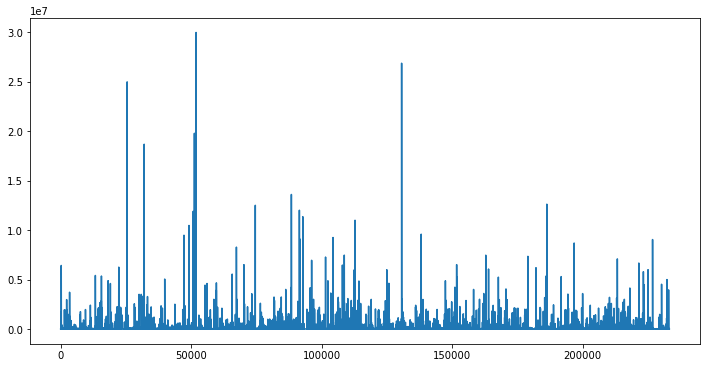

In [57]:
data[ 'SEC.SANCTIONED.AMOUNT'].plot()

<AxesSubplot:>

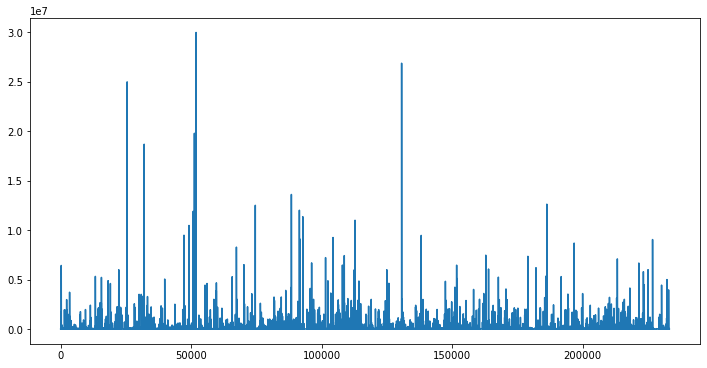

In [58]:
data[ 'SEC.DISBURSED.AMOUNT'].plot()

<AxesSubplot:>

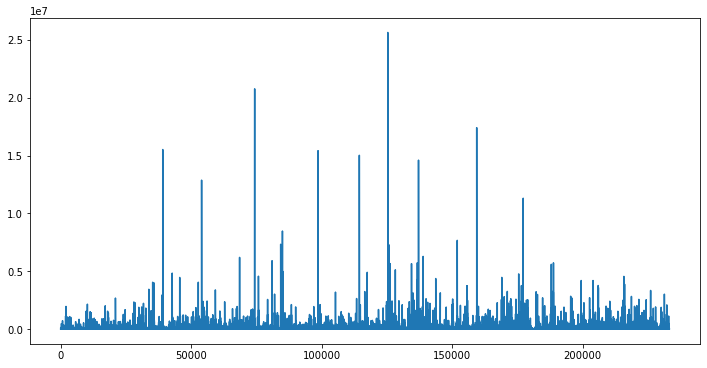

In [59]:
data[ 'PRIMARY.INSTAL.AMT'].plot()

<AxesSubplot:>

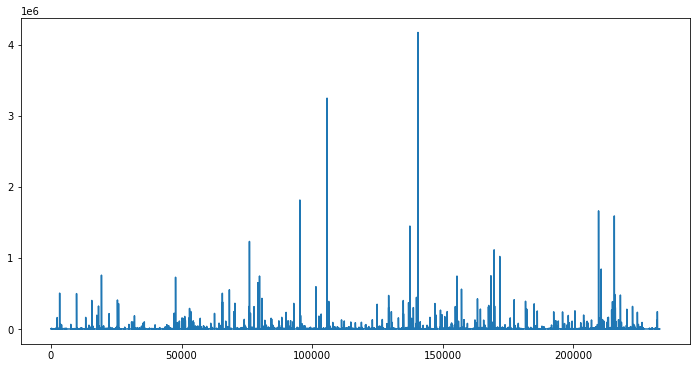

In [60]:
data[ 'SEC.INSTAL.AMT'].plot()

<AxesSubplot:>

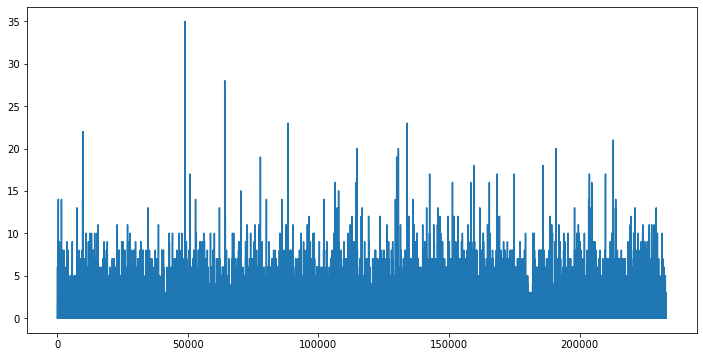

In [61]:
data[ 'NEW.ACCTS.IN.LAST.SIX.MONTHS'].plot()

<AxesSubplot:>

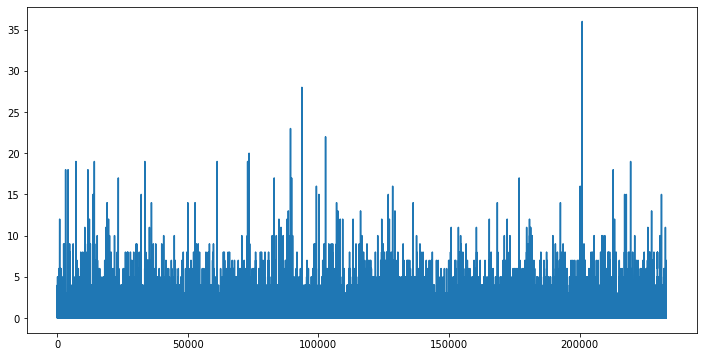

In [62]:
data[ 'NO.OF_INQUIRIES'].plot()

In [63]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [64]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

Note here ! There are Primary and Secondary levels so we should add those and get the total Value for those respective features 

In [65]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [66]:
data['Employment.Type'].isnull().sum()/len(data)

0.0328581109481287

In [67]:
data['Employment.Type'].mode()

0    Self employed
dtype: object

In [68]:
data['Employment.Type'].fillna('Self employed',inplace=True)

In [69]:
from sklearn.preprocessing import  RobustScaler
rob_scaler = RobustScaler()

data[numerical_columns] = rob_scaler.fit_transform(data[numerical_columns])

In [70]:
data.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

Lets remove the Unneccessary columns 

In [71]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [72]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,-0.973785,-0.243066,-0.930384,0.862069,0.051724,0.382676,-1.078947,-0.367019,01-01-84,Salaried,03-08-18,0.0,0.331716,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0yrs 0mon,0yrs 0mon,0.0,0.0
1,0.012097,-0.501809,-0.400156,-0.241379,0.051724,0.382676,-1.078947,-0.352376,31-07-85,Self employed,26-09-18,0.0,0.331716,0.0,0.0,0.0,0.0,0.0,0.0,0.882006,I-Medium Risk,0.333333,1.0,1.0,0.788425,0.8032,0.825658,0.0,0.0,0.0,0.0,0.0,0.0,0.995998,0.0,0.0,1.0,1yrs 11mon,1yrs 11mon,0.0,1.0
2,-1.001345,-0.039569,-0.710877,0.867478,0.051724,0.382676,-1.078947,-0.353577,24-08-85,Self employed,01-08-18,0.0,0.331716,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0yrs 0mon,0yrs 0mon,0.0,0.0
3,0.748515,0.279620,-0.358405,0.789723,0.051724,0.382676,-1.078947,-0.352616,30-12-93,Self employed,26-10-18,0.0,0.331716,0.0,0.0,0.0,0.0,0.0,0.0,0.449853,L-Very High Risk,1.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015508,0.0,0.0,0.0,0yrs 8mon,1yrs 3mon,1.0,1.0
4,0.026016,-0.107401,-0.789484,0.783638,0.051724,0.382676,-1.078947,-0.354057,09-12-77,Self employed,26-09-18,0.0,0.331716,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0yrs 0mon,0yrs 0mon,1.0,1.0


In [73]:
from sklearn.preprocessing import  RobustScaler
rob_scaler = RobustScaler()
data[numerical_columns] = rob_scaler.fit_transform(data[numerical_columns])

In [74]:
# Merging the Primary account and secondary account into one feature 
data['Total_no_of_accts']  = data['PRI.NO.OF.ACCTS' ] + data['SEC.NO.OF.ACCTS']

data['Total_active_account'] = data['PRI.ACTIVE.ACCTS'] + data['SEC.ACTIVE.ACCTS']

data['Total_Over_Due_Accts'] = data['PRI.OVERDUE.ACCTS'] + data['SEC.OVERDUE.ACCTS']

data['Total_Current_bal'] = data['PRI.CURRENT.BALANCE'] + data['SEC.CURRENT.BALANCE']

data['Total_Sanction_amt'] = data['PRI.SANCTIONED.AMOUNT'] + data['SEC.SANCTIONED.AMOUNT']

data['Total_Disbursed_amt'] = data['PRI.DISBURSED.AMOUNT'] + data['SEC.DISBURSED.AMOUNT']

data['Total_Install_amt'] = data['PRIMARY.INSTAL.AMT'] + data['SEC.INSTAL.AMT']


In [75]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Total_no_of_accts', 'Total_active_account',
       'Total_Over_Due_Accts', 'Total_Current_bal',

In [76]:
# Lets remove the unwanted columns 
data.drop(['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','SEC.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS',
          'SEC.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','SEC.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT',
          'SEC.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.DISBURSED.AMOUNT',
          'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','branch_id','supplier_id','Current_pincode_ID',
          'Employee_code_ID'],axis=1,inplace=True)

In [77]:
data.columns


Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'manufacturer_id',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'Total_no_of_accts', 'Total_active_account', 'Total_Over_Due_Accts',
       'Total_Current_bal', 'Total_Sanction_amt', 'Total_Disbursed_amt',
       'Total_Install_amt'],
      dtype='object')

In [78]:
categorical_features = data.select_dtypes(include=['object']).columns
print(categorical_features)


Index(['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH'],
      dtype='object')


In [79]:
data['Date.of.Birth']

0         01-01-84
1         31-07-85
2         24-08-85
3         30-12-93
4         09-12-77
            ...   
233149    01-08-88
233150    05-12-88
233151    01-06-76
233152    26-03-94
233153    18-02-84
Name: Date.of.Birth, Length: 233154, dtype: object

In [80]:
# Converting the dates into datetime object 
data['Date.of.Birth'] = pd.DatetimeIndex(data['Date.of.Birth'])

In [81]:
data['DisbursalDate'] = pd.DatetimeIndex(data['DisbursalDate'])

In [82]:
data['DisbursalDate']

0        2018-03-08
1        2018-09-26
2        2018-01-08
3        2018-10-26
4        2018-09-26
            ...    
233149   2018-10-26
233150   2018-10-23
233151   2018-10-24
233152   2018-09-29
233153   2018-10-27
Name: DisbursalDate, Length: 233154, dtype: datetime64[ns]

In [83]:
data['Age'] = (data['DisbursalDate'] - data['Date.of.Birth']) / np.timedelta64(1, 'Y')

In [84]:
data = data.drop(['Date.of.Birth','DisbursalDate'],axis=1)

In [85]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Total_no_of_accts,Total_active_account,Total_Over_Due_Accts,Total_Current_bal,Total_Sanction_amt,Total_Disbursed_amt,Total_Install_amt,Age
0,-0.973785,-0.243066,-0.930384,0.862069,-1.078947,Salaried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0yrs 0mon,0yrs 0mon,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,34.182769
1,0.012097,-0.501809,-0.400156,-0.241379,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882006,I-Medium Risk,0.0,1.0,1yrs 11mon,1yrs 11mon,0.0,1.0,0.333333,1.0,1.0,0.788425,0.8032,0.825658,0.995998,33.156054
2,-1.001345,-0.039569,-0.710877,0.867478,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0yrs 0mon,0yrs 0mon,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,32.375750
3,0.748515,0.279620,-0.358405,0.789723,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449853,L-Very High Risk,0.0,0.0,0yrs 8mon,1yrs 3mon,1.0,1.0,1.000000,0.0,0.0,0.000000,0.0000,0.000000,0.015508,24.821865
4,0.026016,-0.107401,-0.789484,0.783638,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0yrs 0mon,0yrs 0mon,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,41.038488


In [86]:
data['AVERAGE.ACCT.AGE'][1]

'1yrs 11mon'

In [87]:
import re
def to_years(s):
    nos = re.findall(r'(\d+)', string=s)
    yr = int(nos[0])
    mo = int(nos[1])
    return (yr * 12) + mo

In [88]:
data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(lambda x:to_years(x))

In [89]:
data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x:to_years(x))

In [90]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Total_no_of_accts,Total_active_account,Total_Over_Due_Accts,Total_Current_bal,Total_Sanction_amt,Total_Disbursed_amt,Total_Install_amt,Age
0,-0.973785,-0.243066,-0.930384,0.862069,-1.078947,Salaried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,34.182769
1,0.012097,-0.501809,-0.400156,-0.241379,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882006,I-Medium Risk,0.0,1.0,23,23,0.0,1.0,0.333333,1.0,1.0,0.788425,0.8032,0.825658,0.995998,33.156054
2,-1.001345,-0.039569,-0.710877,0.867478,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,32.375750
3,0.748515,0.279620,-0.358405,0.789723,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449853,L-Very High Risk,0.0,0.0,8,15,1.0,1.0,1.000000,0.0,0.0,0.000000,0.0000,0.000000,0.015508,24.821865
4,0.026016,-0.107401,-0.789484,0.783638,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0,0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,41.038488


In [91]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [92]:
# Very low 
# low 
# Medium 
# High 
# Very- high
# Not scored 

In [93]:
performance =[]
for i in data['PERFORM_CNS.SCORE.DESCRIPTION']:
    if 'Very Low' in i :
        performance.append('Very Low Risk')
    elif 'Low' in i :
        performance.append('Low Risk')
    elif 'Medium' in i :
        performance.append('Medium Risk')
    elif 'High' in i:
        performance.append('High Risk')
    elif 'Very High' in i :
        performance.append('Very High Risk')
    else:
        performance.append('Not Scored')
        

In [94]:
performance

['Not Scored',
 'Medium Risk',
 'Not Scored',
 'High Risk',
 'Not Scored',
 'Very Low Risk',
 'Not Scored',
 'Not Scored',
 'Very Low Risk',
 'Very Low Risk',
 'High Risk',
 'Very Low Risk',
 'High Risk',
 'Very Low Risk',
 'High Risk',
 'Not Scored',
 'High Risk',
 'Low Risk',
 'Medium Risk',
 'Medium Risk',
 'Very Low Risk',
 'Very Low Risk',
 'Not Scored',
 'Very Low Risk',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Medium Risk',
 'Very Low Risk',
 'Very Low Risk',
 'Not Scored',
 'Very Low Risk',
 'Not Scored',
 'Not Scored',
 'Medium Risk',
 'Low Risk',
 'High Risk',
 'Very Low Risk',
 'Not Scored',
 'Very Low Risk',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Low Risk',
 'Medium Risk',
 'Very Low Risk',
 'Not Scored',
 'Low Risk',
 'High Risk',
 'Not Scored',
 'Low Risk',
 'Not Scored',
 'Very Low Risk',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Not Scored',
 'Not 

In [95]:
data['Performance'] = performance

In [96]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Total_no_of_accts,Total_active_account,Total_Over_Due_Accts,Total_Current_bal,Total_Sanction_amt,Total_Disbursed_amt,Total_Install_amt,Age,Performance
0,-0.973785,-0.243066,-0.930384,0.862069,-1.078947,Salaried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,34.182769,Not Scored
1,0.012097,-0.501809,-0.400156,-0.241379,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882006,I-Medium Risk,0.0,1.0,23,23,0.0,1.0,0.333333,1.0,1.0,0.788425,0.8032,0.825658,0.995998,33.156054,Medium Risk
2,-1.001345,-0.039569,-0.710877,0.867478,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,32.375750,Not Scored
3,0.748515,0.279620,-0.358405,0.789723,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449853,L-Very High Risk,0.0,0.0,8,15,1.0,1.0,1.000000,0.0,0.0,0.000000,0.0000,0.000000,0.015508,24.821865,High Risk
4,0.026016,-0.107401,-0.789484,0.783638,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0,0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,41.038488,Not Scored


In [97]:
# Clean up 
clean_up ={'Not Scored':-1,
           'Very Low Risk':5,
           'Low Risk':4,
           'Medium Risk':3,
           'High Risk':2,
           'Very High Risk':1
           }

data['Performance'] = data['Performance'].map(clean_up)

In [98]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Total_no_of_accts,Total_active_account,Total_Over_Due_Accts,Total_Current_bal,Total_Sanction_amt,Total_Disbursed_amt,Total_Install_amt,Age,Performance
0,-0.973785,-0.243066,-0.930384,0.862069,-1.078947,Salaried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,34.182769,-1
1,0.012097,-0.501809,-0.400156,-0.241379,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882006,I-Medium Risk,0.0,1.0,23,23,0.0,1.0,0.333333,1.0,1.0,0.788425,0.8032,0.825658,0.995998,33.156054,3
2,-1.001345,-0.039569,-0.710877,0.867478,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,32.375750,-1
3,0.748515,0.279620,-0.358405,0.789723,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449853,L-Very High Risk,0.0,0.0,8,15,1.0,1.0,1.000000,0.0,0.0,0.000000,0.0000,0.000000,0.015508,24.821865,2
4,0.026016,-0.107401,-0.789484,0.783638,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,No Bureau History Available,0.0,0.0,0,0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,41.038488,-1


In [99]:
data = data.drop('PERFORM_CNS.SCORE.DESCRIPTION',axis=1)

In [100]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Total_no_of_accts,Total_active_account,Total_Over_Due_Accts,Total_Current_bal,Total_Sanction_amt,Total_Disbursed_amt,Total_Install_amt,Age,Performance
0,-0.973785,-0.243066,-0.930384,0.862069,-1.078947,Salaried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,34.182769,-1
1,0.012097,-0.501809,-0.400156,-0.241379,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882006,0.0,1.0,23,23,0.0,1.0,0.333333,1.0,1.0,0.788425,0.8032,0.825658,0.995998,33.156054,3
2,-1.001345,-0.039569,-0.710877,0.867478,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,32.375750,-1
3,0.748515,0.279620,-0.358405,0.789723,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449853,0.0,0.0,8,15,1.0,1.0,1.000000,0.0,0.0,0.000000,0.0000,0.000000,0.015508,24.821865,2
4,0.026016,-0.107401,-0.789484,0.783638,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,41.038488,-1


In [101]:
# Lets get the dummies for the Employment type 

In [102]:
data['Employment.Type'].value_counts()

Self employed    135296
Salaried          97858
Name: Employment.Type, dtype: int64

In [103]:
Employment_type = pd.get_dummies(data['Employment.Type'])

In [104]:
Employment_type

,Salaried,Self employed
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
233149,1,0
233150,0,1
233151,1,0
233152,1,0


In [105]:
data = pd.concat((data,Employment_type),axis=1)

In [106]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Total_no_of_accts,Total_active_account,Total_Over_Due_Accts,Total_Current_bal,Total_Sanction_amt,Total_Disbursed_amt,Total_Install_amt,Age,Performance,Salaried,Self employed
0,-0.973785,-0.243066,-0.930384,0.862069,-1.078947,Salaried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,34.182769,-1,1,0
1,0.012097,-0.501809,-0.400156,-0.241379,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882006,0.0,1.0,23,23,0.0,1.0,0.333333,1.0,1.0,0.788425,0.8032,0.825658,0.995998,33.156054,3,0,1
2,-1.001345,-0.039569,-0.710877,0.867478,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,32.375750,-1,0,1
3,0.748515,0.279620,-0.358405,0.789723,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449853,0.0,0.0,8,15,1.0,1.0,1.000000,0.0,0.0,0.000000,0.0000,0.000000,0.015508,24.821865,2,0,1
4,0.026016,-0.107401,-0.789484,0.783638,-1.078947,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,41.038488,-1,0,1


In [107]:
data = data.drop(('Employment.Type'),axis=1)

In [108]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,manufacturer_id,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Total_no_of_accts,Total_active_account,Total_Over_Due_Accts,Total_Current_bal,Total_Sanction_amt,Total_Disbursed_amt,Total_Install_amt,Age,Performance,Salaried,Self employed
0,-0.973785,-0.243066,-0.930384,0.862069,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,34.182769,-1,1,0
1,0.012097,-0.501809,-0.400156,-0.241379,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882006,0.0,1.0,23,23,0.0,1.0,0.333333,1.0,1.0,0.788425,0.8032,0.825658,0.995998,33.156054,3,0,1
2,-1.001345,-0.039569,-0.710877,0.867478,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,32.375750,-1,0,1
3,0.748515,0.279620,-0.358405,0.789723,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449853,0.0,0.0,8,15,1.0,1.0,1.000000,0.0,0.0,0.000000,0.0000,0.000000,0.015508,24.821865,2,0,1
4,0.026016,-0.107401,-0.789484,0.783638,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,41.038488,-1,0,1


In [109]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'manufacturer_id',
       'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Total_no_of_accts', 'Total_active_account',
       'Total_Over_Due_Accts', 'Total_Current_bal', 'Total_Sanction_amt',
       'Total_Disbursed_amt', 'Total_Install_amt', 'Age', 'Performance',
       'Salaried', 'Self employed'],
      dtype='object')

In [110]:
data['loan_default'].value_counts()

0.0    182543
1.0     50611
Name: loan_default, dtype: int64

In [111]:
# So there is a Data Imbalance 

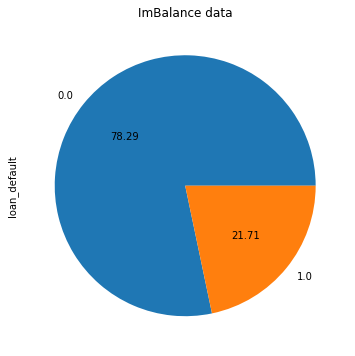

In [112]:
data['loan_default'].value_counts().plot.pie(title='ImBalance data',autopct='%.2f');

In [113]:
# Lets Split the data into X and Y 
x = data.drop(['loan_default'],axis=1)
y = data['loan_default']

In [114]:
# Over sampling 

In [115]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [116]:
y.value_counts()

0.0    182543
1.0     50611
Name: loan_default, dtype: int64

In [117]:
x.head()

,UniqueID,disbursed_amount,asset_cost,ltv,manufacturer_id,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Total_no_of_accts,Total_active_account,Total_Over_Due_Accts,Total_Current_bal,Total_Sanction_amt,Total_Disbursed_amt,Total_Install_amt,Age,Performance,Salaried,Self employed
0,-0.973785,-0.243066,-0.930384,0.862069,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,34.182769,-1,1,0
1,0.012097,-0.501809,-0.400156,-0.241379,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882006,0.0,1.0,23,23,0.0,0.333333,1.0,1.0,0.788425,0.8032,0.825658,0.995998,33.156054,3,0,1
2,-1.001345,-0.039569,-0.710877,0.867478,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,32.375750,-1,0,1
3,0.748515,0.279620,-0.358405,0.789723,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449853,0.0,0.0,8,15,1.0,1.000000,0.0,0.0,0.000000,0.0000,0.000000,0.015508,24.821865,2,0,1
4,0.026016,-0.107401,-0.789484,0.783638,-1.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,1.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,41.038488,-1,0,1


In [118]:
data['loan_default'].value_counts()

0.0    182543
1.0     50611
Name: loan_default, dtype: int64

In [119]:
# Handling the imbalance data with imblearn -> Over sampling and under sampling 
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler()

In [120]:
x_random_sam , y_random_sam = random.fit_resample(x,y) 

In [121]:
print(x_random_sam.shape)
print(y_random_sam.shape)

(365086, 29)
(365086,)


In [122]:
y_random_sam.value_counts()

0.0    182543
1.0    182543
Name: loan_default, dtype: int64

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_random_sam,y_random_sam,test_size=0.2,random_state=0)

In [124]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [125]:
# Lets Print the shape of our train and test data 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(292068, 29)
(292068,)
(73018, 29)
(73018,)


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,f1_score,classification_report
Log = LogisticRegression()
Log.fit(x_train,y_train)

LogisticRegression()

In [127]:
test_prediction = Log.predict(x_test)
train_prediction = Log.predict(x_train)

In [128]:
print('Accuracy_Score of test',accuracy_score(test_prediction,y_test))
print('Accuracy_Score of train',accuracy_score(train_prediction,y_train))
print('#####################################################################')
print('F1_Score of test',f1_score(test_prediction,y_test))
print('F1_Score of train',f1_score(train_prediction,y_train))
print('#####################################################################')

print('Confusion matrix_of test\n',confusion_matrix(test_prediction,y_test))
print('Confusion matrix_of train\n',confusion_matrix(train_prediction,y_train))
print('#####################################################################')

Accuracy_Score of test 0.5934837985154345
Accuracy_Score of train 0.5939130613418793
#####################################################################
F1_Score of test 0.611545155928965
F1_Score of train 0.6127929639677581
#####################################################################
Confusion matrix_of test
 [[19970 13006]
 [16677 23365]]
Confusion matrix_of train
 [[79611 52320]
 [66285 93852]]
#####################################################################


In [129]:
print('Classification report_test\n',classification_report(test_prediction,y_test))

Classification report_test
               precision    recall  f1-score   support

         0.0       0.54      0.61      0.57     32976
         1.0       0.64      0.58      0.61     40042

    accuracy                           0.59     73018
   macro avg       0.59      0.59      0.59     73018
weighted avg       0.60      0.59      0.59     73018



In [130]:
print('classification report_train\n',classification_report(train_prediction,y_train))

classification report_train
               precision    recall  f1-score   support

         0.0       0.55      0.60      0.57    131931
         1.0       0.64      0.59      0.61    160137

    accuracy                           0.59    292068
   macro avg       0.59      0.59      0.59    292068
weighted avg       0.60      0.59      0.59    292068



In [131]:
# Predicting probability
y_train_prob = Log.predict_proba(x_train)
y_test_prob = Log.predict_proba(x_test) 

In [132]:
print('Train_probablity',roc_auc_score(y_train,y_train_prob[:,1]))
print('Test_probability',roc_auc_score(y_test,y_test_prob[:,1]))

Train_probablity 0.6279627914901718
Test_probability 0.626553256400785


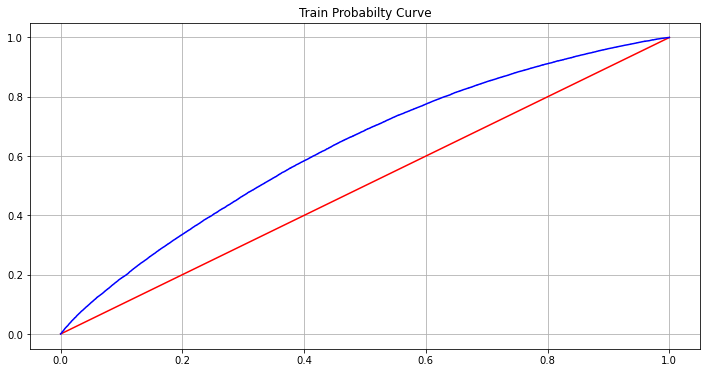

In [133]:
# Lets Plot the AUC and ROC Curve 
fpr,tpr, threshold = roc_curve(y_train,y_train_prob[:,1])
plt.plot(fpr,fpr,color='r')
plt.plot(fpr,tpr,color='b')
plt.grid(True)
plt.gray()
plt.title('Train Probabilty Curve')
plt.show()

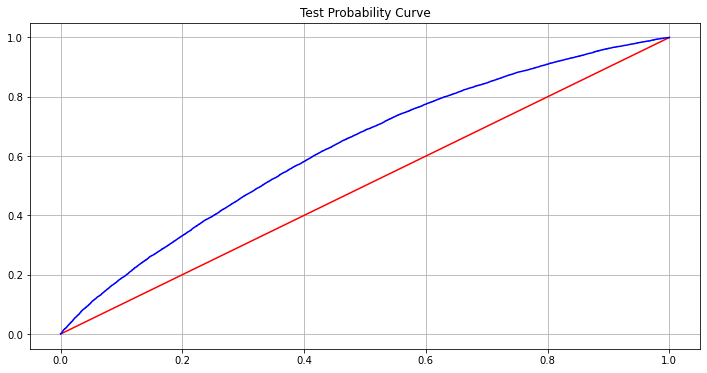

In [134]:
tpr,fpr,thresholds = roc_curve(y_test,y_test_prob[:,1])
plt.plot(fpr,fpr,color='r')
plt.plot(tpr,fpr,color='b')
plt.grid()
plt.gray()
plt.title('Test Probability Curve')
plt.show()

In [135]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=300)
forest.fit(x_train,y_train)

RandomForestClassifier(random_state=300)

In [136]:
train_prediction_rf = forest.predict(x_train)
test_prediction_rf = forest.predict(x_test)

In [137]:
print('Random Forest_Acc_Score',accuracy_score(y_train,train_prediction_rf))
print('Random Forest_Acc_Score',accuracy_score(y_test,test_prediction_rf))
print('###################################################################')
print('Random Forest_F1_Score',f1_score(y_train,train_prediction_rf))
print('Random Forest_F1_score',f1_score(y_test,test_prediction_rf))

Random Forest_Acc_Score 1.0
Random Forest_Acc_Score 0.9358788243994631
###################################################################
Random Forest_F1_Score 1.0
Random Forest_F1_score 0.9368594238860719


In [138]:
print('Confusion_Matrix\n',confusion_matrix(y_train,train_prediction_rf))
print('Confusion_Matrix\n',confusion_matrix(y_test,test_prediction_rf))

Confusion_Matrix
 [[145896      0]
 [     0 146172]]
Confusion_Matrix
 [[33601  3046]
 [ 1636 34735]]


In [139]:
print('classification_report_of _train\n',classification_report(y_train,train_prediction_rf))
print('########################################################################')
print('classification_report_of_test\n',classification_report(y_test,test_prediction_rf))

classification_report_of _train
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    145896
         1.0       1.00      1.00      1.00    146172

    accuracy                           1.00    292068
   macro avg       1.00      1.00      1.00    292068
weighted avg       1.00      1.00      1.00    292068

########################################################################
classification_report_of_test
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93     36647
         1.0       0.92      0.96      0.94     36371

    accuracy                           0.94     73018
   macro avg       0.94      0.94      0.94     73018
weighted avg       0.94      0.94      0.94     73018



In [140]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [141]:
test={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

In [142]:
g_search = GridSearchCV(estimator=XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),param_grid= test,scoring='roc_auc',n_jobs=4,
                    cv=3)


In [143]:
g_search.fit(x_train,y_train)

[19:46:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [144]:
g_search.best_params_,g_search.cv_results_,g_search.best_score_

({'max_depth': 9, 'min_child_weight': 1},
 {'mean_fit_time': array([25.96618207, 24.59582361, 21.76500003, 48.07338635, 41.33807373,
         38.34326243, 59.81046367, 58.27735527, 55.96592625, 80.13707264,
         77.54004137, 57.01395869]),
  'std_fit_time': array([ 0.45697261,  0.33953778,  4.03486209,  1.33648556,  1.14107727,
          1.59716839,  1.88173112,  0.73329232,  2.26091759,  2.35145698,
          0.86088155, 12.9316294 ]),
  'mean_score_time': array([0.17261648, 0.1696016 , 0.17155401, 0.21946319, 0.20921326,
         0.19878737, 0.25102599, 0.2612435 , 0.27721024, 0.33969609,
         0.33294853, 0.27181649]),
  'std_score_time': array([0.00019119, 0.00918496, 0.02456753, 0.00022313, 0.01950031,
         0.00737396, 0.01292563, 0.01471627, 0.00756368, 0.01485474,
         0.0213749 , 0.04843517]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                  

In [145]:
param_for_gamma = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gamm = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_for_gamma, scoring='roc_auc',n_jobs=4,cv=5)

In [146]:
gamm.fit(x_train,y_train)

[20:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [147]:
gamm.best_params_,gamm.best_score_

({'gamma': 0.3}, 0.76083003881673)

In [165]:
xgbp = XGBClassifier(estimator=XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
                                             objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27))

In [166]:
xgbp.fit(x_train,y_train)

[20:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=0.8, gamma=0.3,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=0.1, max_delta_step=None,
                                      max_depth=9, min...
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=

In [167]:
train_prediction_xgbp = xgbp.predict(x_train)
test_prediction_xgbp = xgbp.predict(x_test)

In [168]:
#Accuracy_score
print('Accuracy_score',accuracy_score(train_prediction_xgbp,y_train))
print('Accuracy_score',accuracy_score(test_prediction_xgbp,y_test))
print('F1_Score',f1_score(train_prediction_xgbp,y_train))
print('F1_Score',f1_score(test_prediction_xgbp,y_test))

Accuracy_score 0.6717476751989263
Accuracy_score 0.6466350762825605
F1_Score 0.6858736181283216
F1_Score 0.6621005762179152


In [ ]:
print('classification_report',classification_report(train_prediction_xgbp,y_train))
print('classification_report',classification_report(test_pre))

In [169]:
import lightgbm
from lightgbm import LGBMClassifier
light = LGBMClassifier(random_state=300)

In [170]:
light.fit(x_train,y_train)

LGBMClassifier(random_state=300)

In [171]:
train_prediction_light = light.predict(x_train)
test_prediction_light = light.predict(x_test)

In [172]:
# Accuracy Score  and f1 score
print('Accuracy_Score_train',accuracy_score(y_train,train_prediction_light))
print('Accuracy_Score_test',accuracy_score(y_test,test_prediction_light))
print('#################################################################################################################')
print('F1_Score_train',f1_score(y_train,train_prediction_light))
print('F1_Score_train',f1_score(y_test,test_prediction_light))

Accuracy_Score_train 0.6366120218579235
Accuracy_Score_test 0.624900709414117
#################################################################################################################
F1_Score_train 0.652768780794221
F1_Score_train 0.6408047107578917


In [173]:
# Confusion matrix 
print('Confusion_matrix_train\n',confusion_matrix(y_train,train_prediction_light))
print('###################################################################################################################')
print('Confusion_matrix_test\n',confusion_matrix(y_test,test_prediction_light))

Confusion_matrix_train
 [[86172 59724]
 [46410 99762]]
###################################################################################################################
Confusion_matrix_test
 [[21198 15449]
 [11940 24431]]


In [174]:
# Classification report 
print('Classification_report_train\n',classification_report(y_train,train_prediction_light))
print('#####################################################################################################################')
print('Classification_report_test\n',classification_report(y_test,test_prediction_light))

Classification_report_train
               precision    recall  f1-score   support

         0.0       0.65      0.59      0.62    145896
         1.0       0.63      0.68      0.65    146172

    accuracy                           0.64    292068
   macro avg       0.64      0.64      0.64    292068
weighted avg       0.64      0.64      0.64    292068

#####################################################################################################################
Classification_report_test
               precision    recall  f1-score   support

         0.0       0.64      0.58      0.61     36647
         1.0       0.61      0.67      0.64     36371

    accuracy                           0.62     73018
   macro avg       0.63      0.63      0.62     73018
weighted avg       0.63      0.62      0.62     73018



# Catbooster 

In [175]:
import catboost
from catboost import CatBoostClassifier

In [176]:
cat = CatBoostClassifier(depth=10)

In [177]:
cat.fit(x_train,y_train)

Learning rate set to 0.116331
0:	learn: 0.6861641	total: 332ms	remaining: 5m 31s
1:	learn: 0.6809209	total: 684ms	remaining: 5m 41s
2:	learn: 0.6761973	total: 1.07s	remaining: 5m 55s
3:	learn: 0.6722492	total: 1.45s	remaining: 6m 1s
4:	learn: 0.6687671	total: 1.82s	remaining: 6m 3s
5:	learn: 0.6657426	total: 2.14s	remaining: 5m 55s
6:	learn: 0.6634277	total: 2.44s	remaining: 5m 46s
7:	learn: 0.6610959	total: 2.77s	remaining: 5m 42s
8:	learn: 0.6590850	total: 3.07s	remaining: 5m 38s
9:	learn: 0.6571929	total: 3.39s	remaining: 5m 35s
10:	learn: 0.6558395	total: 3.68s	remaining: 5m 31s
11:	learn: 0.6545637	total: 4s	remaining: 5m 29s
12:	learn: 0.6532151	total: 4.31s	remaining: 5m 27s
13:	learn: 0.6517571	total: 4.54s	remaining: 5m 19s
14:	learn: 0.6505251	total: 4.77s	remaining: 5m 13s
15:	learn: 0.6494698	total: 4.99s	remaining: 5m 7s
16:	learn: 0.6483943	total: 5.21s	remaining: 5m 1s
17:	learn: 0.6473010	total: 5.44s	remaining: 4m 56s
18:	learn: 0.6465427	total: 5.67s	remaining: 4m 52s

158:	learn: 0.5862768	total: 44.2s	remaining: 3m 53s
159:	learn: 0.5858729	total: 44.5s	remaining: 3m 53s
160:	learn: 0.5856282	total: 44.7s	remaining: 3m 52s
161:	learn: 0.5851806	total: 45s	remaining: 3m 52s
162:	learn: 0.5849881	total: 45.2s	remaining: 3m 52s
163:	learn: 0.5845662	total: 45.5s	remaining: 3m 51s
164:	learn: 0.5843049	total: 45.7s	remaining: 3m 51s
165:	learn: 0.5838654	total: 46s	remaining: 3m 50s
166:	learn: 0.5835674	total: 46.2s	remaining: 3m 50s
167:	learn: 0.5832823	total: 46.4s	remaining: 3m 49s
168:	learn: 0.5831072	total: 46.7s	remaining: 3m 49s
169:	learn: 0.5827771	total: 46.9s	remaining: 3m 49s
170:	learn: 0.5825771	total: 47.2s	remaining: 3m 48s
171:	learn: 0.5823355	total: 47.4s	remaining: 3m 48s
172:	learn: 0.5820866	total: 47.7s	remaining: 3m 47s
173:	learn: 0.5817320	total: 47.9s	remaining: 3m 47s
174:	learn: 0.5815507	total: 48.2s	remaining: 3m 47s
175:	learn: 0.5812496	total: 48.4s	remaining: 3m 46s
176:	learn: 0.5809297	total: 48.7s	remaining: 3m 4

313:	learn: 0.5423738	total: 1m 25s	remaining: 3m 7s
314:	learn: 0.5419910	total: 1m 26s	remaining: 3m 7s
315:	learn: 0.5416627	total: 1m 26s	remaining: 3m 7s
316:	learn: 0.5413616	total: 1m 26s	remaining: 3m 6s
317:	learn: 0.5410892	total: 1m 26s	remaining: 3m 6s
318:	learn: 0.5407570	total: 1m 27s	remaining: 3m 6s
319:	learn: 0.5405349	total: 1m 27s	remaining: 3m 5s
320:	learn: 0.5402616	total: 1m 27s	remaining: 3m 5s
321:	learn: 0.5400045	total: 1m 28s	remaining: 3m 5s
322:	learn: 0.5398626	total: 1m 28s	remaining: 3m 5s
323:	learn: 0.5395767	total: 1m 28s	remaining: 3m 4s
324:	learn: 0.5393525	total: 1m 28s	remaining: 3m 4s
325:	learn: 0.5389802	total: 1m 29s	remaining: 3m 4s
326:	learn: 0.5387927	total: 1m 29s	remaining: 3m 3s
327:	learn: 0.5384725	total: 1m 29s	remaining: 3m 3s
328:	learn: 0.5382338	total: 1m 29s	remaining: 3m 3s
329:	learn: 0.5380136	total: 1m 30s	remaining: 3m 2s
330:	learn: 0.5377761	total: 1m 30s	remaining: 3m 2s
331:	learn: 0.5376178	total: 1m 30s	remaining:

467:	learn: 0.5072835	total: 2m 8s	remaining: 2m 26s
468:	learn: 0.5070853	total: 2m 8s	remaining: 2m 26s
469:	learn: 0.5067966	total: 2m 9s	remaining: 2m 25s
470:	learn: 0.5065509	total: 2m 9s	remaining: 2m 25s
471:	learn: 0.5062694	total: 2m 9s	remaining: 2m 25s
472:	learn: 0.5059134	total: 2m 10s	remaining: 2m 24s
473:	learn: 0.5056968	total: 2m 10s	remaining: 2m 24s
474:	learn: 0.5055361	total: 2m 10s	remaining: 2m 24s
475:	learn: 0.5053457	total: 2m 10s	remaining: 2m 24s
476:	learn: 0.5052212	total: 2m 11s	remaining: 2m 23s
477:	learn: 0.5050444	total: 2m 11s	remaining: 2m 23s
478:	learn: 0.5048525	total: 2m 11s	remaining: 2m 23s
479:	learn: 0.5045862	total: 2m 11s	remaining: 2m 22s
480:	learn: 0.5043973	total: 2m 12s	remaining: 2m 22s
481:	learn: 0.5042235	total: 2m 12s	remaining: 2m 22s
482:	learn: 0.5040378	total: 2m 12s	remaining: 2m 21s
483:	learn: 0.5039057	total: 2m 12s	remaining: 2m 21s
484:	learn: 0.5036427	total: 2m 13s	remaining: 2m 21s
485:	learn: 0.5034316	total: 2m 1

620:	learn: 0.4766370	total: 2m 47s	remaining: 1m 42s
621:	learn: 0.4765239	total: 2m 48s	remaining: 1m 42s
622:	learn: 0.4763962	total: 2m 48s	remaining: 1m 41s
623:	learn: 0.4762063	total: 2m 48s	remaining: 1m 41s
624:	learn: 0.4760684	total: 2m 48s	remaining: 1m 41s
625:	learn: 0.4758969	total: 2m 49s	remaining: 1m 41s
626:	learn: 0.4757211	total: 2m 49s	remaining: 1m 40s
627:	learn: 0.4756564	total: 2m 49s	remaining: 1m 40s
628:	learn: 0.4755637	total: 2m 49s	remaining: 1m 40s
629:	learn: 0.4753356	total: 2m 50s	remaining: 1m 39s
630:	learn: 0.4752129	total: 2m 50s	remaining: 1m 39s
631:	learn: 0.4749522	total: 2m 50s	remaining: 1m 39s
632:	learn: 0.4748008	total: 2m 50s	remaining: 1m 39s
633:	learn: 0.4745956	total: 2m 51s	remaining: 1m 38s
634:	learn: 0.4744157	total: 2m 51s	remaining: 1m 38s
635:	learn: 0.4742766	total: 2m 51s	remaining: 1m 38s
636:	learn: 0.4741237	total: 2m 51s	remaining: 1m 37s
637:	learn: 0.4740066	total: 2m 52s	remaining: 1m 37s
638:	learn: 0.4737903	total:

774:	learn: 0.4507356	total: 3m 30s	remaining: 1m 1s
775:	learn: 0.4506225	total: 3m 30s	remaining: 1m
776:	learn: 0.4504563	total: 3m 31s	remaining: 1m
777:	learn: 0.4503182	total: 3m 31s	remaining: 1m
778:	learn: 0.4501961	total: 3m 31s	remaining: 1m
779:	learn: 0.4500099	total: 3m 31s	remaining: 59.8s
780:	learn: 0.4498327	total: 3m 32s	remaining: 59.5s
781:	learn: 0.4497004	total: 3m 32s	remaining: 59.2s
782:	learn: 0.4496001	total: 3m 32s	remaining: 59s
783:	learn: 0.4493915	total: 3m 33s	remaining: 58.7s
784:	learn: 0.4492789	total: 3m 33s	remaining: 58.5s
785:	learn: 0.4491280	total: 3m 33s	remaining: 58.2s
786:	learn: 0.4489330	total: 3m 33s	remaining: 57.9s
787:	learn: 0.4486257	total: 3m 34s	remaining: 57.7s
788:	learn: 0.4484441	total: 3m 34s	remaining: 57.4s
789:	learn: 0.4482159	total: 3m 34s	remaining: 57.1s
790:	learn: 0.4480923	total: 3m 35s	remaining: 56.9s
791:	learn: 0.4479003	total: 3m 35s	remaining: 56.6s
792:	learn: 0.4478042	total: 3m 35s	remaining: 56.3s
793:	le

931:	learn: 0.4271487	total: 4m 12s	remaining: 18.5s
932:	learn: 0.4269814	total: 4m 13s	remaining: 18.2s
933:	learn: 0.4269091	total: 4m 13s	remaining: 17.9s
934:	learn: 0.4267344	total: 4m 13s	remaining: 17.6s
935:	learn: 0.4266107	total: 4m 13s	remaining: 17.4s
936:	learn: 0.4265148	total: 4m 14s	remaining: 17.1s
937:	learn: 0.4262959	total: 4m 14s	remaining: 16.8s
938:	learn: 0.4262294	total: 4m 14s	remaining: 16.5s
939:	learn: 0.4260759	total: 4m 14s	remaining: 16.3s
940:	learn: 0.4258664	total: 4m 15s	remaining: 16s
941:	learn: 0.4257493	total: 4m 15s	remaining: 15.7s
942:	learn: 0.4256031	total: 4m 15s	remaining: 15.5s
943:	learn: 0.4254993	total: 4m 15s	remaining: 15.2s
944:	learn: 0.4252888	total: 4m 16s	remaining: 14.9s
945:	learn: 0.4251585	total: 4m 16s	remaining: 14.6s
946:	learn: 0.4250319	total: 4m 16s	remaining: 14.4s
947:	learn: 0.4248491	total: 4m 17s	remaining: 14.1s
948:	learn: 0.4246435	total: 4m 17s	remaining: 13.8s
949:	learn: 0.4245563	total: 4m 17s	remaining: 1

In [178]:
train_prediction_cat = cat.predict(x_train)
test_prediction_cat = cat.predict(x_test)

In [179]:
# Accuracy Score and F1 Score 
print('Accuracy_Score_train',accuracy_score(y_train,train_prediction_cat))
print('Accuracy_Score_test',accuracy_score(y_test,test_prediction_cat))
print('##############################################################################################################')
print('F1_Score_train',f1_score(y_train,train_prediction_cat))
print('F1_Score_test',f1_score(y_test,test_prediction_cat))

Accuracy_Score_train 0.8436768149882904
Accuracy_Score_test 0.7604837163439152
##############################################################################################################
F1_Score_train 0.8479098725170471
F1_Score_test 0.7709694739461244


In [180]:
# Confusion matrix 
print('Confusion_matrix_train\n',confusion_matrix(y_train,train_prediction_cat))
print('###############################################################################################################')
print('Confusion_matrix_test\n',confusion_matrix(y_test,test_prediction_cat))

Confusion_matrix_train
 [[119141  26755]
 [ 18902 127270]]
###############################################################################################################
Confusion_matrix_test
 [[26093 10554]
 [ 6935 29436]]


In [266]:
# Classification report 
print('Classification_report_train\n',classification_report(y_train,train_prediction_cat))
print('###################################################################################################################')
print('Classification_report_test\n',classification_report(y_test,test_prediction_cat))

Classification_report_train
               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84    145896
         1.0       0.83      0.87      0.85    146172

    accuracy                           0.84    292068
   macro avg       0.84      0.84      0.84    292068
weighted avg       0.84      0.84      0.84    292068

###################################################################################################################
Classification_report_test
               precision    recall  f1-score   support

         0.0       0.79      0.71      0.75     36647
         1.0       0.74      0.81      0.77     36371

    accuracy                           0.76     73018
   macro avg       0.76      0.76      0.76     73018
weighted avg       0.76      0.76      0.76     73018



# Conclusion 

From above models Random forest and Xgboost are performing good 